In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.tree          import DecisionTreeRegressor
from sklearn.ensemble      import RandomForestRegressor
from sklearn.ensemble      import ExtraTreesRegressor
from sklearn.ensemble      import AdaBoostRegressor
from sklearn.ensemble      import GradientBoostingRegressor
from xgboost               import XGBRegressor
from lightgbm              import LGBMRegressor
from catboost              import CatBoostRegressor

from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl
import pandas as pd
import seaborn as sns
import IPython
import numpy as np
import sweetviz as sv

import sklearn
from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.2.5
Sklearn  0.24.2


In [5]:
df = pd.read_csv('heart.csv')

In [6]:
df.isnull().sum()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
'''
1. age (#)
2. sex : 1= Male, 0= Female (Binary)
3. (cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic
4. (trestbps) resting blood pressure (#)
5. (chol) serum cholesterol in mg/dl (#)
6. (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
7. (restecg) resting electrocardiography results(values 0,1,2)
8. (thalach) maximum heart rate achieved (#)
9. (exang) exercise induced angina (binary) (1 = yes; 0 = no)
10. (oldpeak) = ST depression induced by exercise relative to rest (#)
11. (slope) of the peak exercise ST segment (Ordinal) (Value 1: up sloping , Value 2: flat , Value 3: down sloping )
12. (ca) number of major vessels (0–3, Ordinal) colored by fluoroscopy
13. (thal) maximum heart rate achieved — (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversible defect
target = 0 not suffering // 1 suffering


cat_vars = [ 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' ]
num_vars = ['trestbps', 'age', 'chol','thalach', 'oldpeak' ]
"""


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-7-b3e8b67e120f>, line 20)

In [ ]:
"""data =  gen_data[gen_data['slope'] == slope]
def data_enhancement(df):
     
    gen_data = df
    
    for slope in df['slope'].unique():
        
        #print(slope)
        chol_std = data['chol'].std()
        thalach_std = data['thalach'].std()
        trestbps_std = data['trestbps'].std()
        oldpeak_std = data['oldpeak'].std()
        print(oldpeak_std)
        
        for i in data.shape[0]:
            
            if np.random.randint(2) == 1:
                data['chol'].values[i] += chol_std
            else:
                data['chol'].values[i] -= chol_std
                
            if np.random.randint(2) == 1:
                data['thalach'].values[i] += thalach_std
            else:
                data['thalach'].values[i] -= thalach_std
                
            if np.random.randint(2) == 1:
                data['trestbps'].values[i] += trestbps_std
            else:
                data['trestbps'].values[i] -= trestbps_std
                
            if np.random.randint(2) == 1:
                data['oldpeak'].values[i] += oldpeak_std
            else:
                data['oldpeak'].values[i] -= oldpeak_std
        
    return gen_data

gen = data_enhancement(df) 

#print(slope_data.head(21))
#print(df.tail(10))
print(gen.head())
print(df.head())


#chol_std = df['chol'].std()
#data =  gen_data[gen_data['slope'] == slope]"""


NameError: name 'gen_data' is not defined

In [8]:
def thalach_rng(df):
    new_data = df.copy()
    ret_data = pd.DataFrame()

    for x in df['cp'].unique():
        cp_data = new_data[ new_data['cp'] == x]
        for i in df['slope'].unique():
            slope_data = cp_data[ cp_data['slope'] == i]
            t_std   = slope_data['thalach'].std()


            for i in range(slope_data.shape[0]):
                if np.random.randint(2) == 1:
                    slope_data['thalach'].values[i] += t_std
                else:
                    slope_data['thalach'].values[i] -= t_std

            ret_data = pd.concat([ret_data,slope_data])#.Index.drop_duplicates()
    output = ret_data.sort_index()

    return output
def chol_rng(df):
    new_data = df.copy()
    ret_data = pd.DataFrame()
    t_std = new_data['chol'].std()
 
    for i in range(new_data.shape[0]):
        if np.random.randint(2) == 1:
            new_data['chol'].values[i] += t_std
        else:
            new_data['chol'].values[i] -= t_std

    return new_data

chol_rng(df)
thalach_rng(df)    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,169,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,166,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,188,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,161,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,180,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,143,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,111,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,120,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,135,1,1.2,1,1,3,0


In [9]:
#genereating new rows

art_data = thalach_rng(chol_rng(df))
a = art_data.sample(n=200)
b = a['target']
a = a.drop(['target'], axis=1)
ml_input = df.append(a)




In [10]:
y= df['target']
X= df.iloc[:,0:13]


In [11]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test =train_test_split(X, y, test_size =0.33, random_state = 42)

X_train = X_train.append(a)
X_train
y_train = y_train.append(b)

In [12]:
anaylze_report = sv.analyze(df)
anaylze_report.show_html('analyze.html', open_browser = True)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


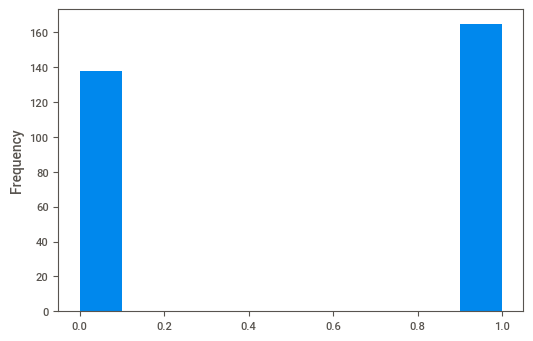

In [ ]:
df.target.plot.hist();

<AxesSubplot:>

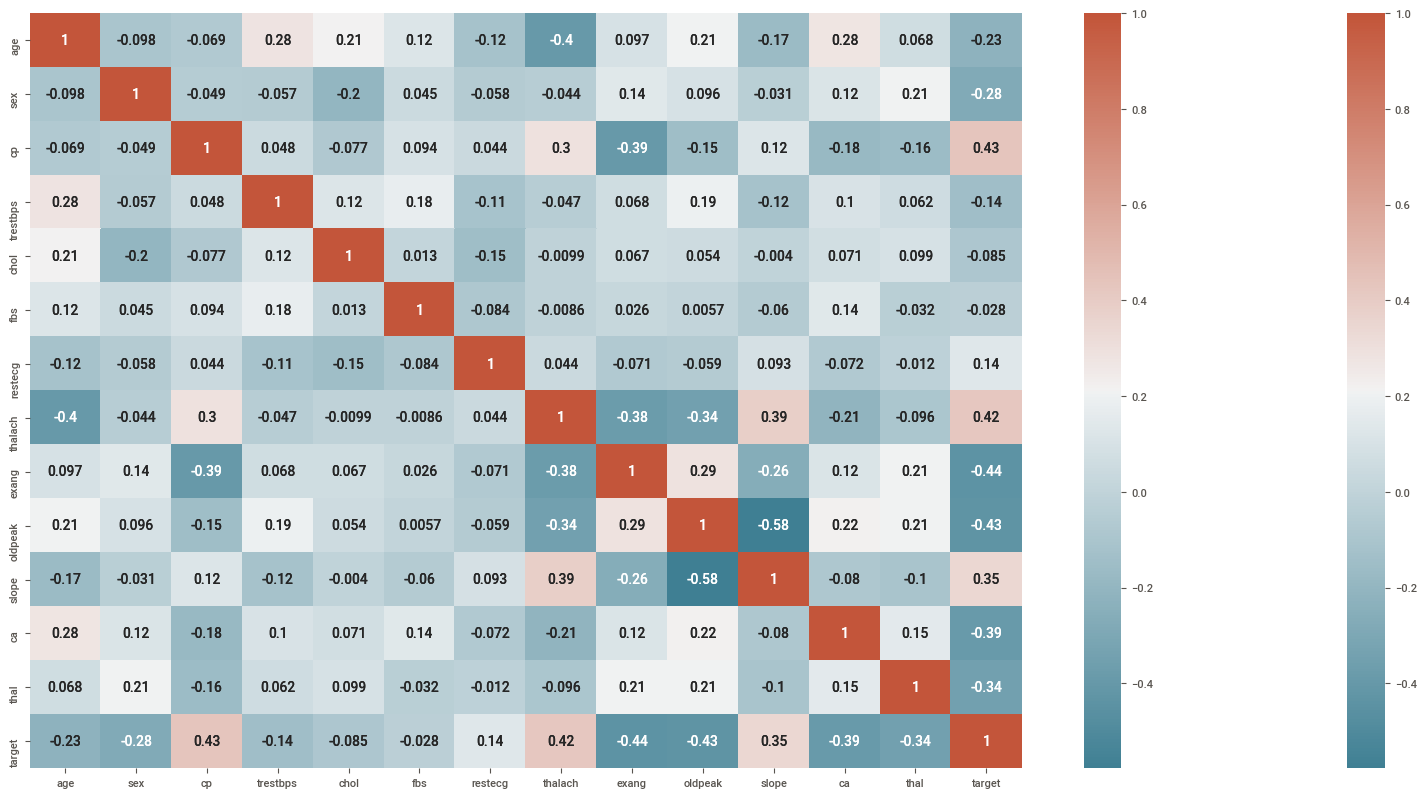

In [ ]:
 corr = df.corr()
 plt.subplots(figsize=(20,10))
 sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.diverging_palette(220, 20, as_cmap=True))
 sb.heatmap(corr, xticklabels=corr.columns,
             yticklabels=corr.columns, 
             annot=True,
             cmap=sb.diverging_palette(220, 20, as_cmap=True))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
cat_vars  = ['sex', 'cp', 'fbs','restecg','exang','ca','slope','thal']        
num_vars  = ['age', 
             'trestbps',
             'chol',
             'thalach',
             'oldpeak',
            
            ] 


print("\nNumerical features:\n", num_vars)
print("\nCategorical features:\n", cat_vars)


Numerical features:
 ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Categorical features:
 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'slope', 'thal']


In [ ]:
# sb.catplot(x="target", y="chol", hue="slope", kind="bar", data=df);

# plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
# plt.xlabel('Heart Disease',size=20)
# plt.ylabel('ST depression',size=20)

LETS PUT SOME STUFF TO PIPELINE!


In [14]:
cat_pipe = pipeline.Pipeline(steps= [
    ('ordinal', preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value',
    unknown_value = np.nan))
    ])



num_mutli_pipe = pipeline.Pipeline(steps=[
  ('scalar', preprocessing.QuantileTransformer(n_quantiles=200, output_distribution='normal', random_state=10))
])



multi_preprocess  = compose.ColumnTransformer(transformers=[
    ('num', num_mutli_pipe, num_vars),
    ('cat', cat_pipe, cat_vars),
], remainder='drop')

display(multi_preprocess)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scalar',
                                                  QuantileTransformer(n_quantiles=200,
                                                                      output_distribution='normal',
                                                                      random_state=10))]),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak']),
                                ('cat',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan))]),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca',
                                  'slope', 'thal'])])

MODELS SELECTION


In [ ]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

# Multiplicative models
from sklearn.svm            import SVR
from sklearn.linear_model   import Lasso
from sklearn.linear_model   import SGDRegressor
from sklearn.linear_model   import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors      import KNeighborsRegressor

In [15]:
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":   ExtraTreesClassifier(n_estimators=100),
  "Random Forest": RandomForestClassifier(n_estimators=100),
  "AdaBoost":      AdaBoostClassifier(n_estimators=100),
  "Skl GBM":       GradientBoostingClassifier(n_estimators=100),
  "Skl HistGBM":   HistGradientBoostingClassifier(max_iter=100),
  "XGBoost":       XGBClassifier(n_estimators=100),
  "LightGBM":      LGBMClassifier(n_estimators=100),
  "CatBoost":      CatBoostClassifier(n_estimators=100),
}

tree_classifiers = {name: pipeline.make_pipeline(num_mutli_pipe, model) for name, model in tree_classifiers.items()}


In [ ]:
#print(X_train)
print(y_train)

37     1
16     1
126    1
291    0
273    0
      ..
92     1
38     1
56     1
297    0
259    0
Name: target, Length: 263, dtype: int64


In [18]:
models = {}
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})


for model_name, model in tree_classifiers.items(): # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
     start_time = time.time()
     model.fit(X_train, y_train)
     pred = model.predict(X_test)    # GET PREDICTIONS USING x_val
     total_time = time.time() - start_time

     results = results.append({"Model":    model_name,
                                "Confusion Matrix": confusion_matrix(y_test, pred),
                                "Accuracy": metrics.accuracy_score(y_test, pred)*100,
                                "Bal Acc.": metrics.balanced_accuracy_score(y_test, pred)*100,
                                "Time":     total_time},
                                ignore_index=True)
                              
                              


# Your code goes here


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

C:\Users\Wojtek\anaconda3\envs\dl\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.05773
0:	learn: 0.6724004	total: 144ms	remaining: 14.3s
1:	learn: 0.6535070	total: 145ms	remaining: 7.13s
2:	learn: 0.6343257	total: 147ms	remaining: 4.75s
3:	learn: 0.6169433	total: 148ms	remaining: 3.55s
4:	learn: 0.6026800	total: 149ms	remaining: 2.83s
5:	learn: 0.5886562	total: 150ms	remaining: 2.35s
6:	learn: 0.5732850	total: 151ms	remaining: 2.01s
7:	learn: 0.5613831	total: 152ms	remaining: 1.75s
8:	learn: 0.5498318	total: 153ms	remaining: 1.55s
9:	learn: 0.5385497	total: 154ms	remaining: 1.39s
10:	learn: 0.5282501	total: 155ms	remaining: 1.26s
11:	learn: 0.5188927	total: 156ms	remaining: 1.15s
12:	learn: 0.5109024	total: 157ms	remaining: 1.05s
13:	lear

,Model,Accuracy,Bal Acc.,Time,Confusion Matrix
1,Extra Trees,94.000000,94.170772,0.125664,[[40 2] [ 4 54]]
2,Random Forest,90.000000,90.394089,0.131650,[[39 3] [ 7 51]]
3,Decision Tree,89.000000,88.875205,0.021965,[[37 5] [ 6 52]]
4,LightGBM,89.000000,89.203612,0.179520,[[38 4] [ 7 51]]
5,Skl GBM,88.000000,88.013136,0.089763,[[37 5] [ 7 51]]
6,CatBoost,88.000000,88.013136,0.393505,[[37 5] [ 7 51]]
7,Skl HistGBM,87.000000,86.822660,0.424840,[[36 6] [ 7 51]]
8,XGBoost,86.000000,86.617406,0.184507,[[38 4] [10 48]]
9,AdaBoost,84.000000,83.579639,0.133642,[[34 8] [ 8 50]]


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# accuracy_score = accuracy_score(y_test, pred)
# confusion_matrix = confusion_matrix(y_test, pred)
# display(confusion_matrix)
# display(accuracy_score)

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test =train_test_split(X, y, test_size =0.33, random_state = 42)
other_XT = X_train
other_yT = y_train
X_train = X_train.append(a)
X_train
y_train = y_train.append(b)

results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})


for model_name, model in tree_classifiers.items(): # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
     start_time = time.time()
     model.fit(other_XT, other_yT)
     pred = model.predict(X_test)    # GET PREDICTIONS USING x_val
     total_time = time.time() - start_time

     results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_test, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_test, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)



# Your code goes here


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')





C:\Users\Wojtek\anaconda3\envs\dl\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[17:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.043076
0:	learn: 0.6806591	total: 1.13ms	remaining: 112ms
1:	learn: 0.6680758	total: 2.57ms	remaining: 126ms
2:	learn: 0.6559892	total: 3.61ms	remaining: 117ms
3:	learn: 0.6470297	total: 4.82ms	remaining:

,Model,Accuracy,Bal Acc.,Time
1,LightGBM,85.000000,85.098522,0.068816
2,Skl HistGBM,83.000000,83.045977,0.238341
3,CatBoost,83.000000,82.389163,0.165476
4,Random Forest,82.000000,81.527094,0.127656
5,XGBoost,82.000000,81.855501,0.108709
6,Extra Trees,81.000000,81.321839,0.103724
7,AdaBoost,80.000000,80.788177,0.147620
8,Skl GBM,76.000000,76.354680,0.073824
9,Decision Tree,73.000000,73.768473,0.023957
